In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set_style('darkgrid')
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=14) 

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('trashscience/data.csv', header=0, index_col='Histnum')
data.head()

,Days,Age,Death,O2,Reanim,Ventilator,Hypert,CHF,Diabetes,CKD,Onco,COPD,AF,Sex
Histnum,,,,,,,,,,,,,,
16532,8,84,0,1,0,0,0,1,0,0,0,0,1,1
15602,7,71,0,0,0,0,0,0,0,0,0,0,0,1
15606,8,60,0,0,0,0,0,0,0,0,0,0,0,0
15607,8,45,0,0,0,0,0,0,0,0,0,0,0,0
15609,18,26,0,0,0,0,0,0,0,0,0,0,0,1


In [3]:
data.shape[0]

599

**Количество наблюдений**: 599

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 599 entries, 16532 to 16308
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Days        599 non-null    int64
 1   Age         599 non-null    int64
 2   Death       599 non-null    int64
 3   O2          599 non-null    int64
 4   Reanim      599 non-null    int64
 5   Ventilator  599 non-null    int64
 6   Hypert      599 non-null    int64
 7   CHF         599 non-null    int64
 8   Diabetes    599 non-null    int64
 9   CKD         599 non-null    int64
 10  Onco        599 non-null    int64
 11  COPD        599 non-null    int64
 12  AF          599 non-null    int64
 13  Sex         599 non-null    int64
dtypes: int64(14)
memory usage: 70.2 KB


## Описание признаков  
### Анализируемые переменные  
**Age** (непрерывная) - возраст пациента на день госпитализации  
**Sex** (номинальная, бинарная) - пол: мужской (0) и женский (1)  
**Hypert** (номинальная, бинарная) - артериальная гипертензия (1) по данным эпикриза  
**CHF** (номинальная, бинарная) - клинически явная хроническая сердечная недостаточность (Н2А и более) по данным эпикриза  
**Diabetes** (номинальная, бинарная) - сахарный диабет (СД) по лабораторным данным (глюкоза натощак) и данным эпикриза  
**CKD** (номинальная, бинарная) - ХБП с СКФ менее 35 мл/мин/1,73м2 (С3B и более) по лабораторным данным  
**Onco** (номинальная, бинарная) - активное (не в ремисии) онкологическое заболевание по данным эпикриза  
**COPD** (номинальная, бинарная) - хроническая обструктивная болезнь легких (ХОБЛ) по данным эпикриза  
**AF** (номинальная, бинарная) - любая форма фибрилляции предсердий (ФП) с зарегистрированной на ЭКГ ФП в период госпитализации  
### Целевые переменные (исходы)
**Death** (номинальная, бинарная) - выписан живым (0), умер в стационаре (1)  
**O2** (номинальная, бинарная) - нуждаемость в кислороде (1)  
**Reanim** (номинальная, бинарная) - пребывание в реанимации (1)  
**Ventilator** (номинальная, бинарная) - нуждаемость в вентиляции легких (в том числе неинвазивной)  
**Days** (непрерывная) - количество дней пребывания в стационаре

In [5]:
col_continous = ["Age", "Days"]
col_nominal = ["Hypert", "CHF", "Diabetes", "CKD", "Onco", "COPD"]
col_nominal_af = ["AF", "Hypert", "CHF", "Diabetes", "CKD", "Onco", "COPD"]
col_outcome = ["O2", "Reanim", "Ventilator", "Death"]

## Анализируемые переменные
### Непрерывные

In [6]:
data[col_continous].describe()

,Age,Days
count,599.000000,599.000000
mean,64.207012,10.727880
std,14.707763,7.121807
min,18.000000,1.000000
25%,57.000000,7.000000
50%,66.000000,9.000000
75%,73.000000,12.500000
max,96.000000,61.000000


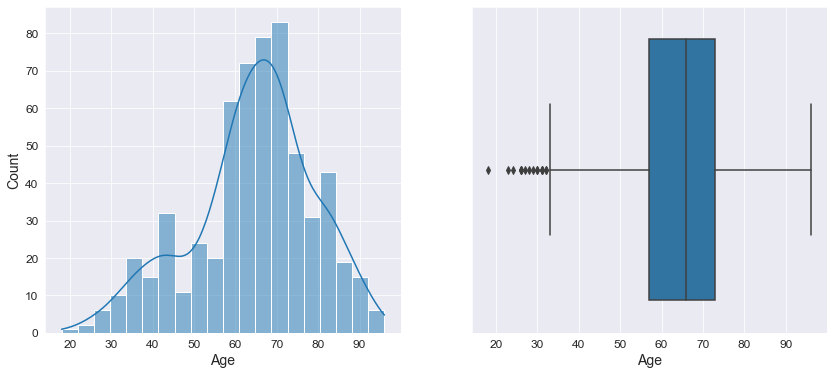

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(14,6));
sns.histplot(data=data, x='Age', kde=True, bins=20, ax=ax[0]);
sns.boxplot(data=data, x='Age', ax=ax[1]);

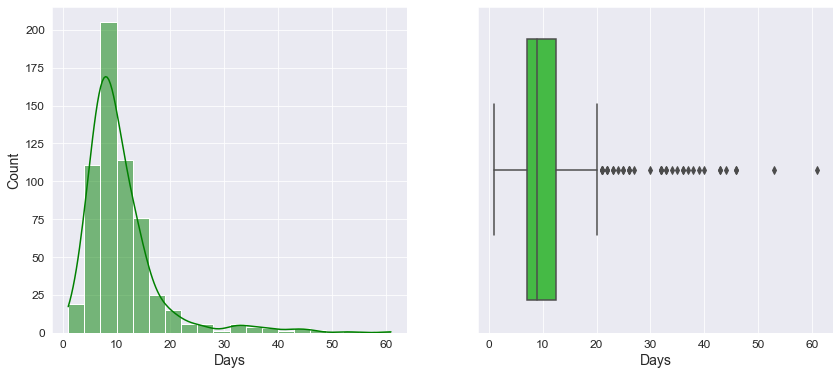

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(14,6));
sns.histplot(data=data, x='Days', kde=True, bins=20, ax=ax[0], color="green");
sns.boxplot(data=data, x='Days', ax=ax[1], color="limegreen");

### Номинальные

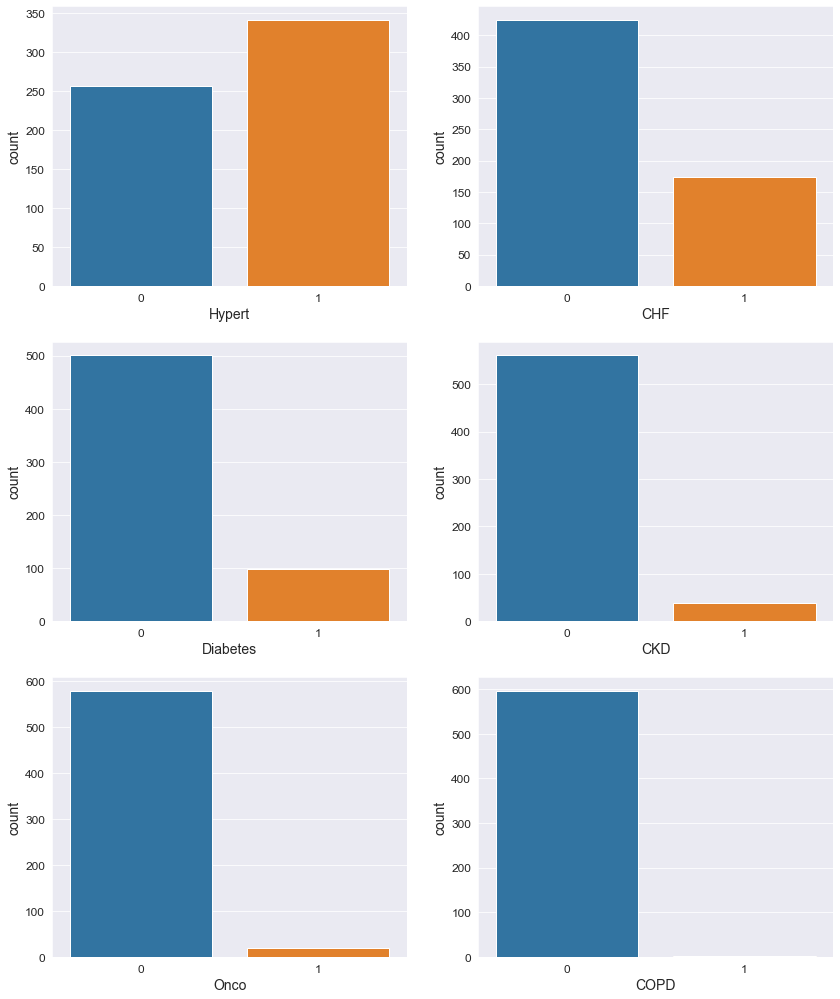

In [9]:
fig, ax = plt.subplots(3, 2, figsize=(14, 12));
for i, col in enumerate(col_nominal):
    sns.countplot(data=data, x=col, ax=ax[i // 2, i % 2]);
plt.subplots_adjust(top=1.15, bottom=0.05)

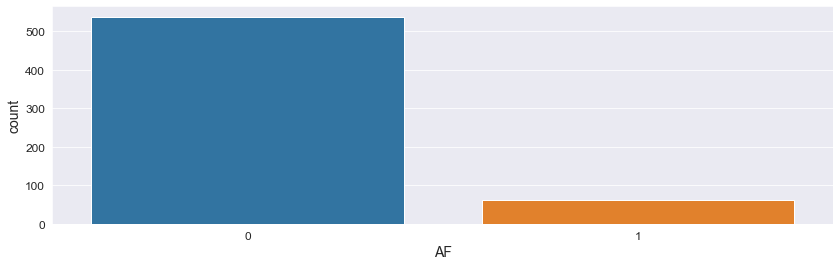

In [10]:
plt.figure(figsize=(14, 4))
sns.countplot(data=data, x="AF");

In [11]:
df1 = pd.DataFrame()
for col in col_nominal_af:
    df1[col] = data[col].value_counts().round(0).map('{:,.0f}'.format)
    df1[col + " (%)"] = (data[col].value_counts(normalize=True)*100).round(1).map('{}%'.format)
df1 = df1.transpose()
df1

,0,1
AF,538,61
AF (%),89.8%,10.2%
Hypert,257,342
Hypert (%),42.9%,57.1%
CHF,425,174
CHF (%),71.0%,29.0%
Diabetes,501,98
Diabetes (%),83.6%,16.4%
CKD,561,38
CKD (%),93.7%,6.3%


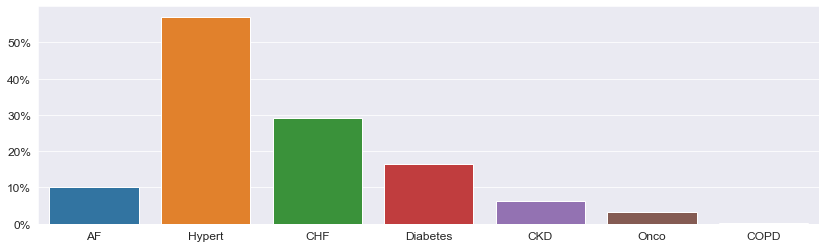

In [12]:
import matplotlib.ticker as mtick
plt.figure(figsize=(14, 4))
ax = sns.barplot(x=df1.iloc[::2, 1].index, y=df1.iloc[::2, 1].astype(int)/(df1.iloc[::2, 0].astype(int)+df1.iloc[::2, 1].astype(int)));
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))

### Исходы

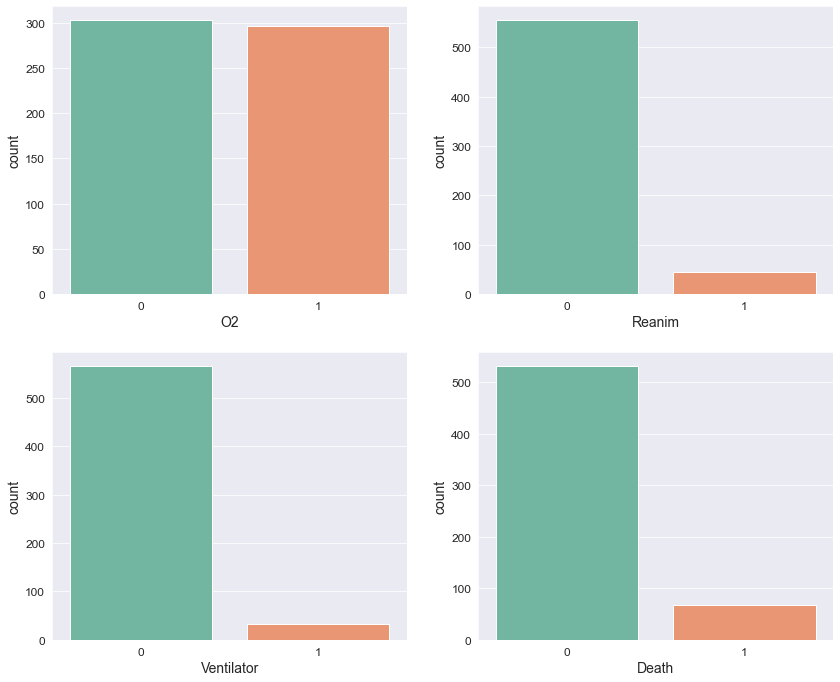

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(14, 8));
for i, col in enumerate(col_outcome):
    sns.countplot(data=data, x=col, ax=ax[i // 2, i % 2], palette="Set2");
plt.subplots_adjust(top=1.15, bottom=0.05)

In [14]:
df2 = pd.DataFrame()
for col in col_outcome:
    df2[col] = data[col].value_counts().round(0).map('{:,.0f}'.format)
    df2[col + " (%)"] = (data[col].value_counts(normalize=True)*100).round(1).map('{}%'.format)
df2 = df2.transpose()
df2

,0,1
O2,303,296
O2 (%),50.6%,49.4%
Reanim,555,44
Reanim (%),92.7%,7.3%
Ventilator,567,32
Ventilator (%),94.7%,5.3%
Death,532,67
Death (%),88.8%,11.2%


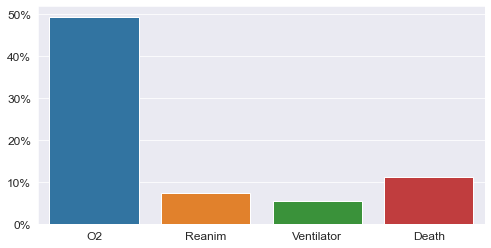

In [15]:
plt.figure(figsize=(8, 4))
ax = sns.barplot(x=df2.iloc[::2, 1].index, y=df2.iloc[::2, 1].astype(int)/(df2.iloc[::2, 0].astype(int)+df2.iloc[::2, 1].astype(int)));
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))

## Связь между анализируемыми признаками и исходами

### Возраст

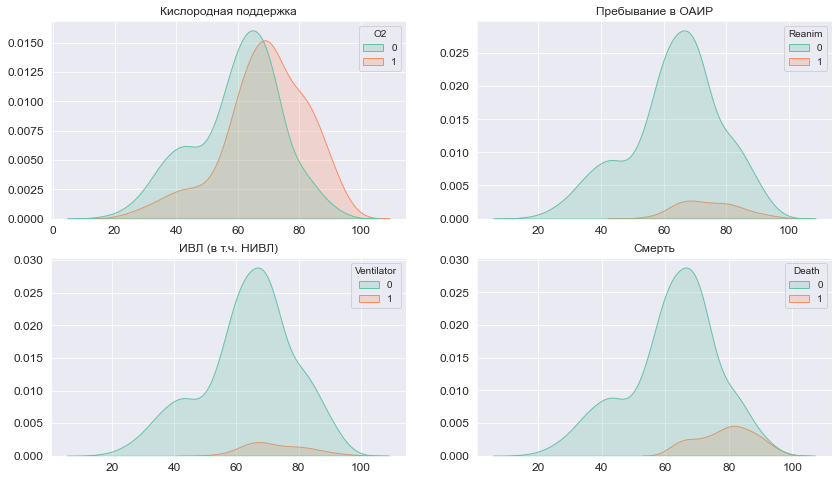

In [16]:
fig, ax = plt.subplots(2, 2, figsize=(14, 8));
sns.kdeplot(x='Age', data=data, hue='O2', shade=True, palette="Set2", ax=ax[0, 0]).set_title("Кислородная поддержка");
sns.kdeplot(x='Age', data=data, hue='Reanim', shade=True, palette="Set2", ax=ax[0, 1]).set_title("Пребывание в ОАИР");
sns.kdeplot(x='Age', data=data, hue='Ventilator', shade=True, palette="Set2", ax=ax[1, 0]).set_title("ИВЛ (в т.ч. НИВЛ)");
sns.kdeplot(x='Age', data=data, hue='Death', shade=True, palette="Set2", ax=ax[1, 1]).set_title("Смерть");
for row, col in [(0, 0), (0, 1), (1, 0), (1, 1)]:
    ax[row, col].xaxis.label.set_visible(False);
    ax[row, col].yaxis.label.set_visible(False);
plt.show();

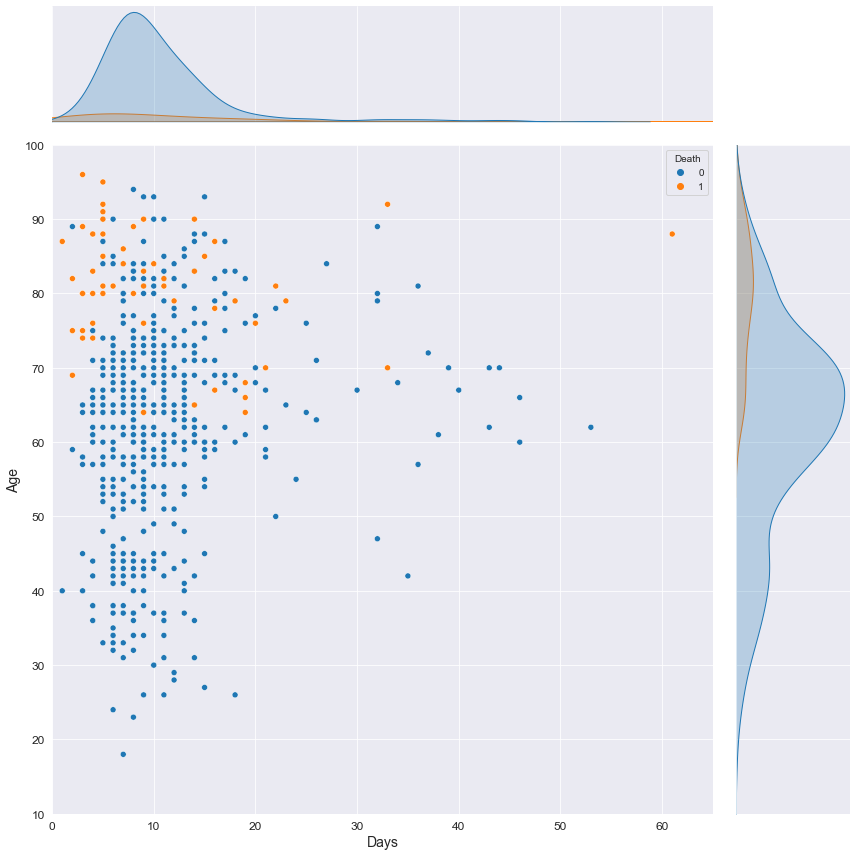

In [17]:
sns.jointplot(data=data, x="Days", y="Age", hue="Death", height=12, xlim=[0, 65], ylim=[10, 100]);

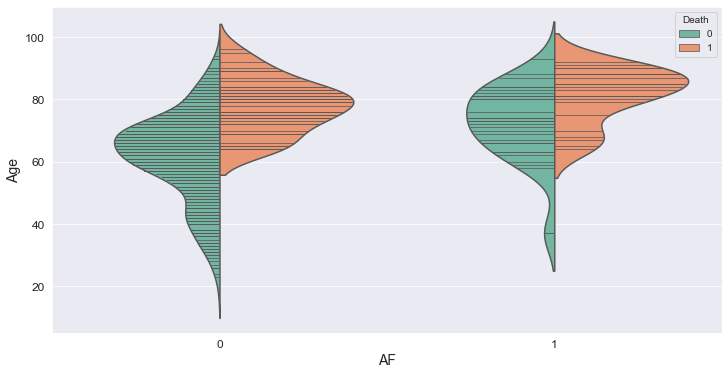

In [18]:
plt.figure(figsize=(12, 6));
sns.violinplot(x="AF", y="Age", hue="Death", data=data, palette="Set2", inner="stick", split=True);

### Пол

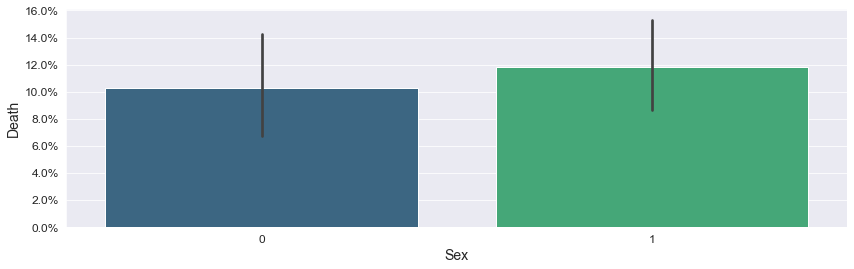

In [19]:
plt.figure(figsize=(14, 4))
ax = sns.barplot(data=data, x="Sex", y="Death", palette="viridis")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1));

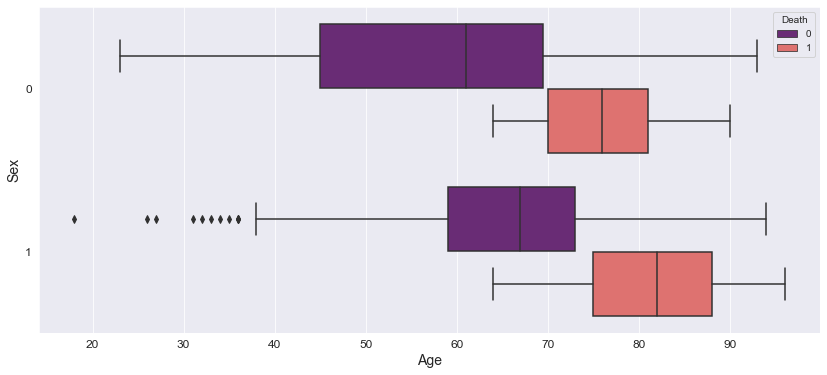

In [20]:
plt.figure(figsize=(14, 6))
sns.boxplot(x="Age", y="Sex", hue="Death", data=data, orient="h", palette="magma");

### Коморбидность

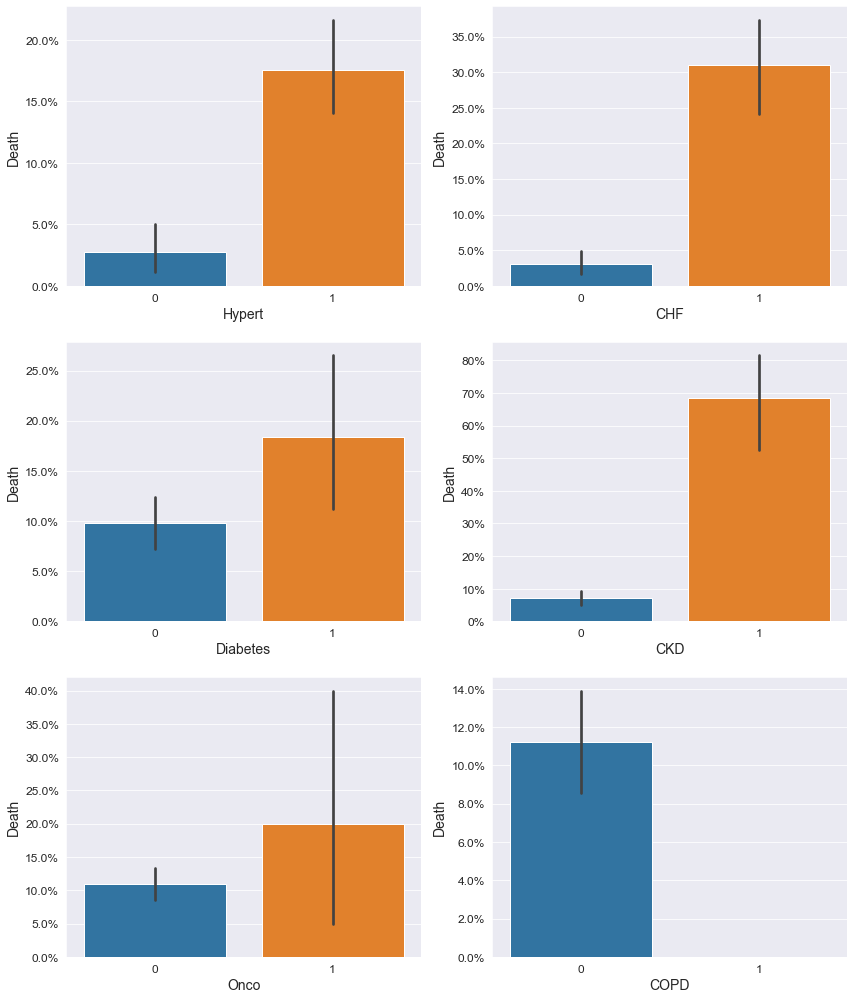

In [21]:
fig, ax = plt.subplots(3, 2, figsize=(14, 12));
for i, col in enumerate(col_nominal):
    sns.barplot(data=data, x=col, y="Death", ax=ax[i // 2, i % 2]);
    ax[i // 2, i % 2].yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.subplots_adjust(top=1.15, bottom=0.05)

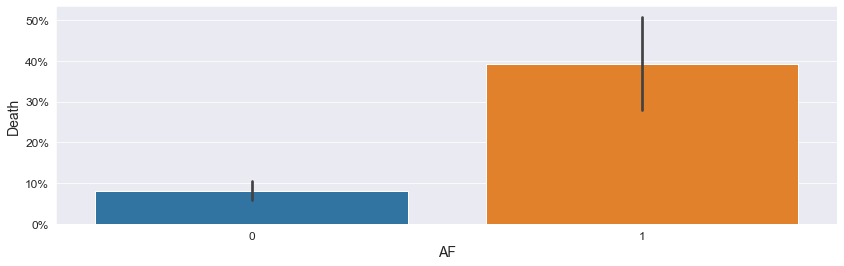

In [22]:
plt.figure(figsize=(14, 4))
ax = sns.barplot(data=data, x="AF", y="Death")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1));

## Корреляционный анализ

In [23]:
data.drop(columns=["COPD"], inplace=True)

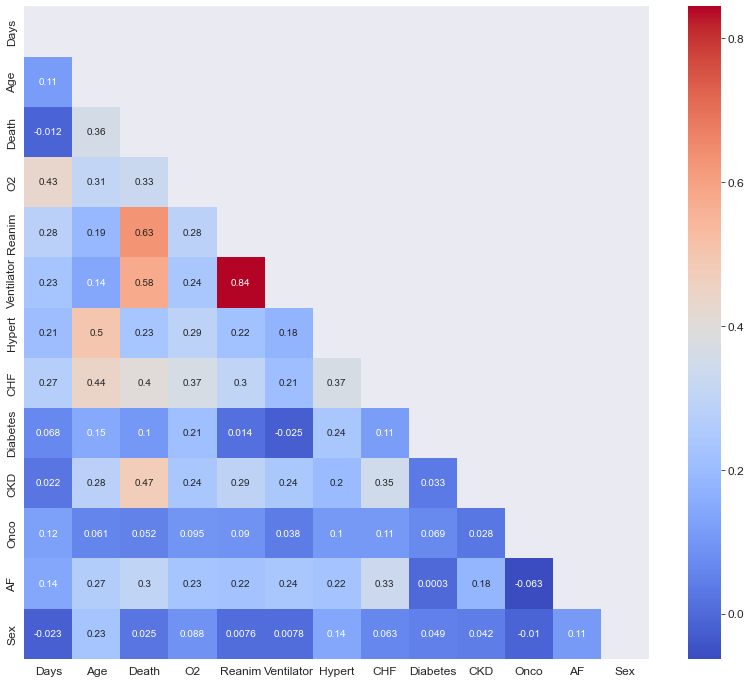

In [24]:
corr= data.corr()
matrix = np.triu(corr)
plt.figure(figsize=(14, 12))
sns.heatmap(corr, annot=True, mask=matrix, cmap='coolwarm');

## Логистическая регрессия

In [25]:
col_independent = ["Age", "Sex", "AF", "Hypert", "CHF", "Diabetes", "CKD", "Onco"]
col_dependent = ["O2", "Reanim", "Ventilator", "Death"]

In [26]:
def scale(X):
    return (X - np.mean(X, axis=0))/np.std(X)

In [27]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix, accuracy_score, brier_score_loss)
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import itertools

In [28]:
def create_model(columns, regularize=True, report=True, random_state=7):
    X = data.loc[:, columns]
    X = scale(X)
    X = sm.add_constant(X)
    y = data.loc[:, col_dependent[3]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=6)

    
    model = sm.Logit(y_train, X_train)
    if not regularize:
        result = model.fit(method='newton')
    else:
        result = model.fit_regularized()
    
    yhat = result.predict(X_test)
    prediction = list(map(round, yhat))
    cm = confusion_matrix(y_test, prediction)
    cmatr = pd.DataFrame(cm)
    display(cmatr)
    tn, fp, fn, tp = cm.ravel()
    print(f"Negative predictive value = {tn/(tn+fn)}")
    print(f"Positive predictive value = {tp/(tp+fp)}")
    
    print(f"Sensitivity (recall, true positive rate) = {tp/(tp+fn)}")
    print(f"Specifity (true negative rate) = {tn/(tn+fp)}")
    
    print('Test accuracy = ', accuracy_score(y_test, prediction))
    
    params = result.params
    conf = result.conf_int()
    conf['Odds Ratio'] = params
    conf.columns = ['5%', '95%', 'Odds Ratio']
    print(np.exp(conf))

    fpr, tpr, _ = metrics.roc_curve(y_test,  yhat)
    auc = metrics.roc_auc_score(y_test, yhat)
    plt.figure(figsize=(8, 8))
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()
    
    if report:
        return result
    else:
        return None

In [29]:
def print_roc_for_combinations(columns, regularize=True):
    y = data.loc[:, col_dependent[3]]
    plt.figure(figsize=(10, 10))
    for combination in itertools.combinations(columns, len(columns)-1):
        X = data.loc[:, combination]
        X = scale(X)
        X = sm.add_constant(X)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=6)

        model = sm.Logit(y_train, X_train)
        if not regularize:
            result = model.fit(method='newton')
        else:
            result = model.fit_regularized()

        yhat = result.predict(X_test)
        
        prediction = list(map(round, yhat))
        cm = confusion_matrix(y_test, prediction)
        tn, fp, fn, tp = cm.ravel()
        NPV =tn/(tn+fn)
        
        fpr, tpr, _ = metrics.roc_curve(y_test,  yhat)
        auc = metrics.roc_auc_score(y_test, yhat)
        plt.plot(fpr,tpr,label=f"{combination}, auc="+str(auc)+", NPV="+str(NPV))
        plt.legend(loc=4)
    plt.show()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2377278776480003
            Iterations: 44
            Function evaluations: 44
            Gradient evaluations: 44


,0,1
0,135,4
1,3,8


Negative predictive value = 0.9782608695652174
Positive predictive value = 0.6666666666666666
Sensitivity (recall, true positive rate) = 0.7272727272727273
Specifity (true negative rate) = 0.9712230215827338
Test accuracy =  0.9533333333333334
                5%       95%  Odds Ratio
const     0.022572  0.081575    0.042910
Age       1.916377  5.769818    3.325229
Sex       0.436614  0.934093    0.638622
AF        1.133136  1.929910    1.478800
Hypert    0.778536  2.188203    1.305218
CHF       1.130438  2.301201    1.612875
Diabetes  0.942240  1.733849    1.278164
CKD       1.187116  1.952857    1.522586
Onco      0.810159  1.378304    1.056714


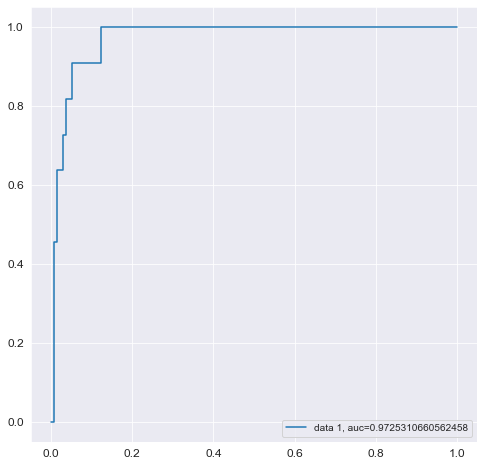

In [30]:
create_model(col_independent)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.25082761443407053
            Iterations: 36
            Function evaluations: 36
            Gradient evaluations: 36
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.24064154167678276
            Iterations: 36
            Function evaluations: 36
            Gradient evaluations: 36
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.24631097049514314
            Iterations: 31
            Function evaluations: 31
            Gradient evaluations: 31
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2392038582680527
            Iterations: 35
            Function evaluations: 35
            Gradient evaluations: 35
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.24677670904608398
            Iterations: 36
            Function

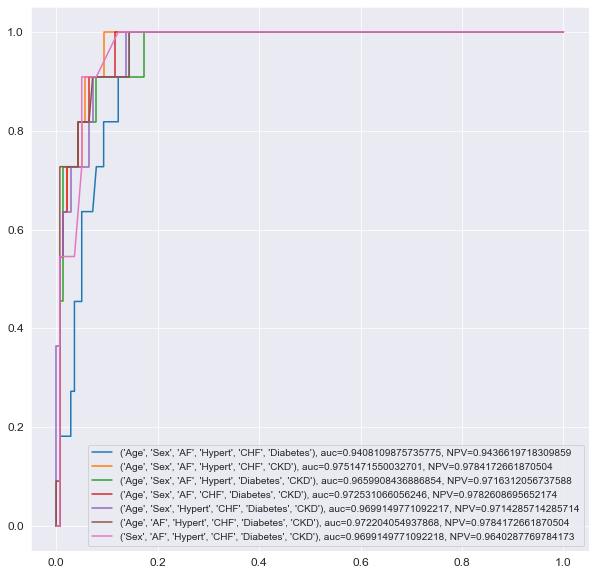

In [31]:
print_roc_for_combinations(["Age", "Sex", "AF", "Hypert", "CHF", "Diabetes", "CKD"], regularize=True)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.261953524885484
            Iterations: 23
            Function evaluations: 23
            Gradient evaluations: 23
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2577255834235001
            Iterations: 22
            Function evaluations: 22
            Gradient evaluations: 22
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2535740430792856
            Iterations: 22
            Function evaluations: 23
            Gradient evaluations: 22
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.26921243605613226
            Iterations: 24
            Function evaluations: 24
            Gradient evaluations: 24


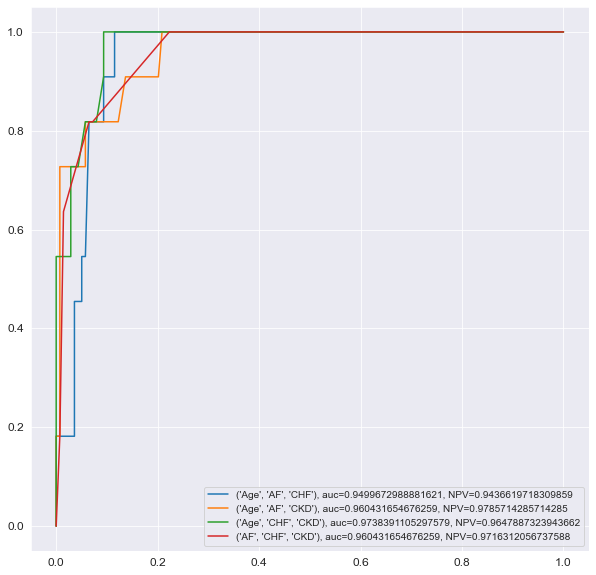

In [34]:
print_roc_for_combinations(["Age", "AF", "CHF", "CKD"], regularize=True)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2810232634991849
            Iterations: 19
            Function evaluations: 19
            Gradient evaluations: 19
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2684356853362733
            Iterations: 19
            Function evaluations: 19
            Gradient evaluations: 19
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.29293960639380934
            Iterations: 16
            Function evaluations: 16
            Gradient evaluations: 16


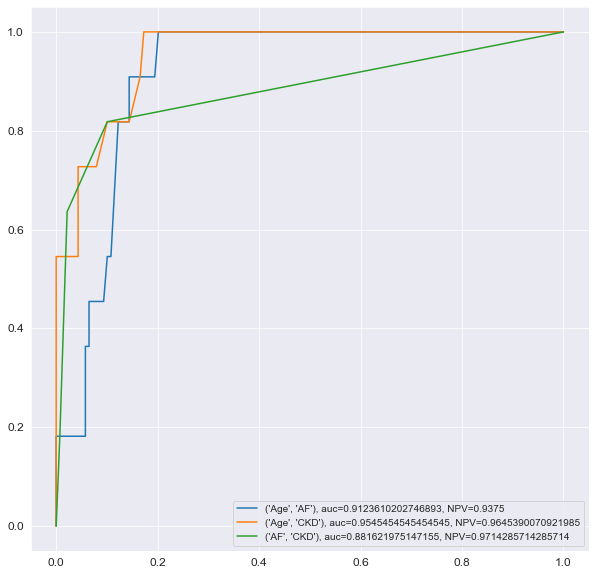

In [32]:
print_roc_for_combinations(["Age", "AF", "CKD"], regularize=True)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2577255834235001
            Iterations: 22
            Function evaluations: 22
            Gradient evaluations: 22


,0,1
0,137,2
1,3,8


Negative predictive value = 0.9785714285714285
Positive predictive value = 0.8
Sensitivity (recall, true positive rate) = 0.7272727272727273
Specifity (true negative rate) = 0.9856115107913669
Test accuracy =  0.9666666666666667
             5%       95%  Odds Ratio
const  0.037222  0.101279    0.061399
Age    2.153308  5.726971    3.511685
AF     1.165715  1.911972    1.492921
CKD    1.346880  2.145574    1.699951


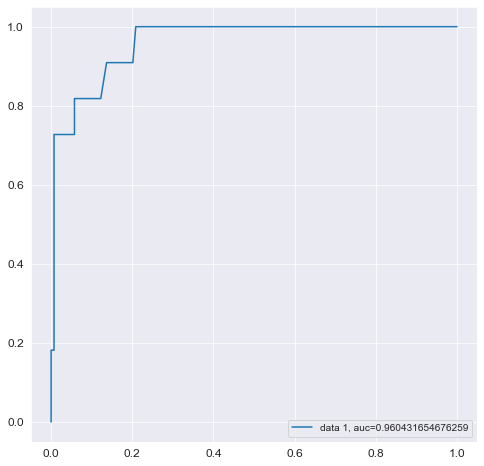

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Death   No. Observations:                  449
Model:                          Logit   Df Residuals:                      445
Method:                           MLE   Df Model:                            3
Date:                Tue, 12 Apr 2022   Pseudo R-squ.:                  0.3150
Time:                        02:04:25   Log-Likelihood:                -115.72
converged:                       True   LL-Null:                       -168.93
Covariance Type:            nonrobust   LLR p-value:                 6.482e-23
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.7904      0.255    -10.927      0.000      -3.291      -2.290
Age            1.2561      0.250      5.034      0.000       0.767       1.745
AF             0.4007      0.126      3.175      0.001       0.153       0.648
CKD            0.5306      0.119      4.467      0.000       0.298       0.763
==============================================================================
"""

In [33]:
create_model(["Age", "AF", "CKD"]).summary()